# Project D

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

In [2]:
#import cleaned dataset from last project - https://github.com/SarahNadeau/datascience-projectB/blob/master/cleaned.csv
data = pd.DataFrame.from_csv('cleaned.csv')
encoded_data = pd.DataFrame.from_csv('cleaned.csv')

print(data.shape)

# print(data.head(10))

# convert non-numerical to categorical integer values
for col in data.columns:
    if data[col].dtype != 'float64' and data[col].dtype != 'int64':  
        enc = LabelEncoder()
        encoded_data[col] = enc.fit_transform(encoded_data[col])
        encoded_data[col] = enc.fit_transform(encoded_data[col])
        
# print(encoded_data.head(10))

# scale features using StandardScaler
scaled_data = StandardScaler().fit_transform(encoded_data)

(1457, 80)


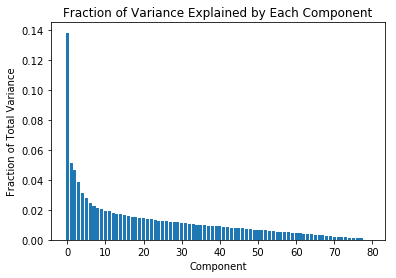

In [3]:
# perform PCA using encoded, scaled data
pca = PCA().fit(scaled_data)

# plot fraction of variance explained by each component
var = pca.explained_variance_ratio_
x = np.arange(len(var))
plt.bar(x, var)
plt.title('Fraction of Variance Explained by Each Component')
plt.xlabel('Component')
plt.ylabel('Fraction of Total Variance')
plt.show()

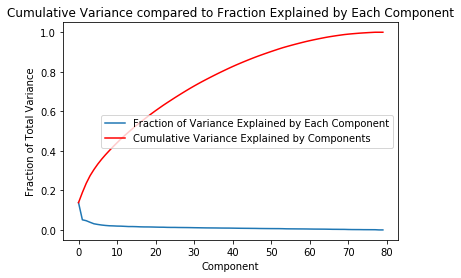

In [4]:
# include cumulative variance explained by components in plot

# get vector of cumulative variance explained for each component
cumulative_var = np.zeros(len(pca.explained_variance_ratio_))
var_explained = 0
for i,j in zip(pca.explained_variance_ratio_, range(0, len(cumulative_var))):
    var_explained += i
    cumulative_var[j] = var_explained
    
# plot
individual, = plt.plot(var, label='Fraction of Variance Explained by Each Component')
cumulative, = plt.plot(cumulative_var, color='r', label='Cumulative Variance Explained by Components')
plt.xlabel('Component')
plt.title('Cumulative Variance compared to Fraction Explained by Each Component')
plt.ylabel('Fraction of Total Variance')
plt.legend(handles = [individual, cumulative])
plt.show()

Realizing that many of the components explain a very low proportion of the dataset's overall variance, we limit the number of components. 

In [5]:
# perform PCA to find fewer components
n_comp = 40
pca = PCA(n_components=n_comp).fit(scaled_data)

In [6]:
print("{:2.2f}% of total variance is explained by {} components".format(sum(pca.explained_variance_ratio_)*100, n_comp))

81.64% of total variance is explained by 40 components


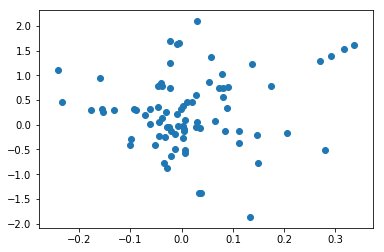

In [7]:
# what features correspond to those 5 components? Which features are correlated?
# each component in components_ is a unit vector ?? see: http://astrostatistics.psu.edu/su09/lecturenotes/pca.html

x = pca.components_[1]
y = scaled_data[4]
plt.scatter(x,y)
plt.show()